In [ ]:
import os
os.chdir('../')

In [2]:
from viz.utils import *
from main import run_vehicle

# QFedAvgServer

In [9]:
train_dir='data/vehicle/train/'
test_dir='data/vehicle/test/'
configs={
    # Model configs
    'layer_sizes': [100,1], 'act_funcs': ['none'],
    'dataset_name': 'vehicle',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 20,
    'pct_client_per_round': 10.0/23.0,
    'num_epochs': 1,
    'batch_size': 64,
    'lr': 0.01,
    's':0.1,
    'q': 5,
    'disable_tqdm':False
}

server, clients = run_vehicle(train_dir, test_dir, configs, report=False)

100%|██████████| 20/20 [00:02<00:00,  7.61it/s]


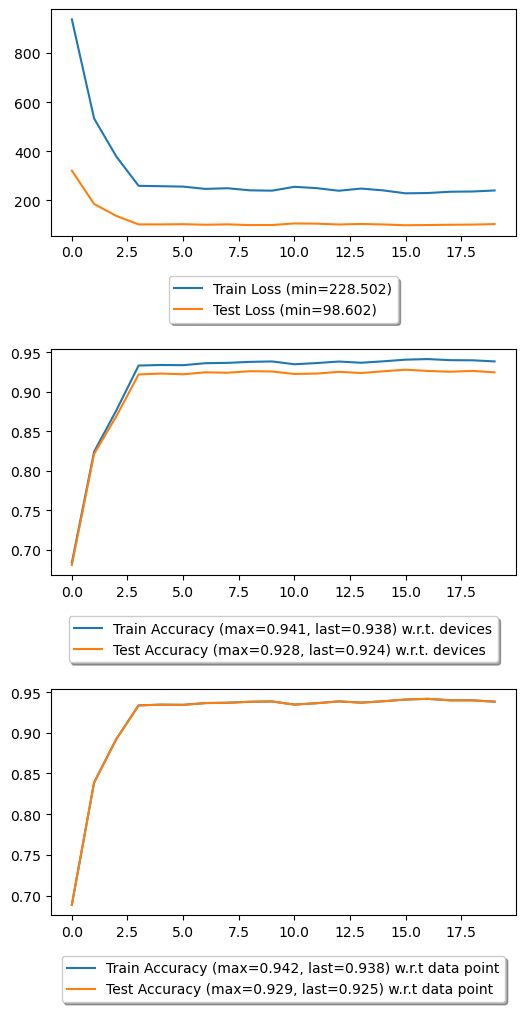

In [10]:
df = get_results_from_server(server)
g = plot_by_round(df)

# DL_FedAvgServer

In [12]:
train_dir='data/vehicle/train/'
test_dir='data/vehicle/test/'
configs={
    # Model configs
    'layer_sizes': [100,1], 'act_funcs': ['none'],
    'dataset_name': 'vehicle',
    'method_name': 'DL_FedAvgServer',
    # Server configs
    'num_rounds': 20,
    'pct_client_per_round': 10.0/23.0,
    'num_epochs': 1,
    'batch_size': 64,
    'lr': 0.01,
    's':5.0,
    'disable_tqdm':False
}

server, clients = run_vehicle(train_dir, test_dir, configs, report=False)

100%|██████████| 20/20 [00:02<00:00,  7.79it/s]


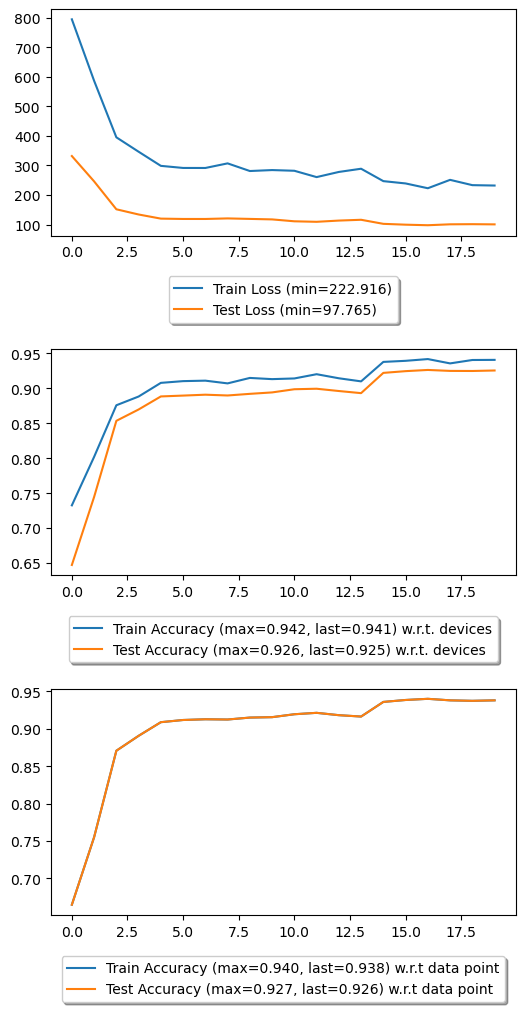

In [13]:
df = get_results_from_server(server)
g = plot_by_round(df)